## Логистическая регрессия

#### План:
1. Логистическая регрессия
2. Ирисы Фишера. Свойства логистической регрессии
3. Логистическая регрессия на менее приятных данных.
4. ROC-кривая.
---

### Логистическая регрессия

Мы решаем задачу бинарной классификации, в которой целевая переменная $y$ принимает два значения: -1 и 1. Эту задачу можно решить при помощи линейного классификатора

$$
f(x_i, w) = \mathrm{sign}\left(\langle x_i, w \rangle\right).
$$

Функция потерь для такой задачи – это сумма индикаторов того, что предсказание сделано неверно:

$$Q(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}[y_i \ne \mathrm{sign}\left(\langle x_i, w \rangle\right)].$$


Логистическая регрессия предлагает использовать логистическую функцию потерь:

$$
Q'(X, w) = \frac{1}{\ell}\sum_{i = 1}^{\ell}\log(1 + e^{-y_i \langle x_i, w \rangle}) \rightarrow \min_w.
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ирисы Фишера. Свойства логистической регрессии

Рассмотрим свойства логистической регрессии и метода опорных векторов на примере классического набора данных ["Ирисы Фишера"](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Этот набор состоит из 150 наблюдений, каждое из которых представляет собой четыре измерения: длина наружной доли околоцветника (`sepal length`), ширина наружной доли околоцветника (`sepal width`), длина внутренней доли околоцветника (`petal length`), ширина внутренней доли околоцветника (`petal width`). Каждое наблюдение относится к одному из трёх классов ириса: `setosa`, `versicolor` или `virginica`. Задача состоит в том, чтобы по измерениям предсказать класс цветка.

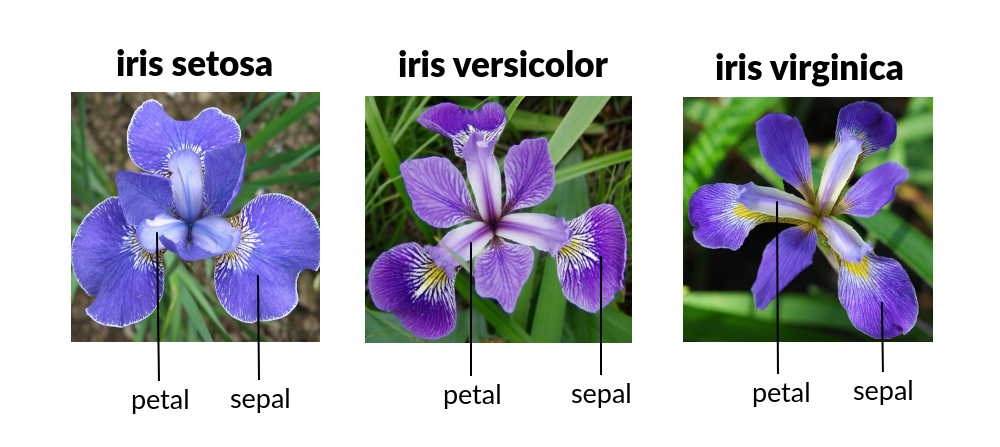



In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Задание 1.** Перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду `versicolor` против принадлежности ко всем прочим видам. Перекодируйте зависимую переменную так, чтобы цветки вида `versicolor` имели метку 1, а прочих видов – метку -1.

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
y[y != 1] = -1

In [6]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

**Задание 2**. Будем работать с двумя признаками: `sepal length (cm)` и `sepal width (cm)`. Отделите их в отдельную матрицу. Разделите выборку на обучающую и тестовую, долю тестовой выборки укажите равной 0.3. Отмасштабируйте выборки при помощи StandardScaler. Постройте диаграмму рассеяния по тренировочной выборке и убедитесь, что данные линейно не разделимы.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

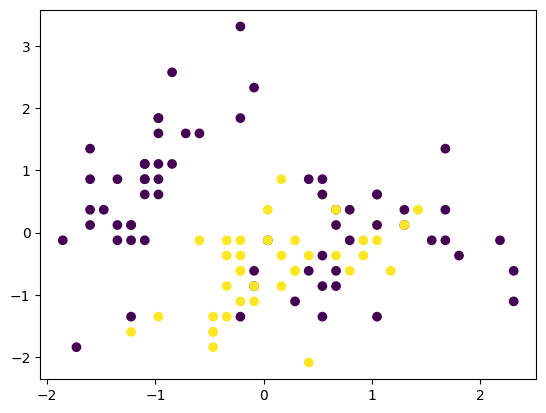

In [8]:
X = X[['sepal length (cm)', 'sepal width (cm)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

**Задание 3.** Начнём с простого. Обучите логистическую регрессию на тренировочной выборке. Убедитесь, что `accuracy`, возможно, не подходит в качестве метрики для данной задачи и рассчитайте `f1-меру` на тестовой выборке.

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

print(lr.coef_)

[[ 0.1816305  -1.04223331]]


In [11]:
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

-1    65
 1    40
Name: count, dtype: int64
-1    35
 1    10
Name: count, dtype: int64


In [12]:
lr.predict(X_test)

array([ 1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1])

In [13]:
from sklearn.metrics import f1_score
print('Logistic Regression: ', f1_score(y_test, lr.predict(X_test)))

Logistic Regression:  0.6956521739130435


Код ниже построит решающие поверхности для классификаторов.

In [14]:
#!pip install mlxtend

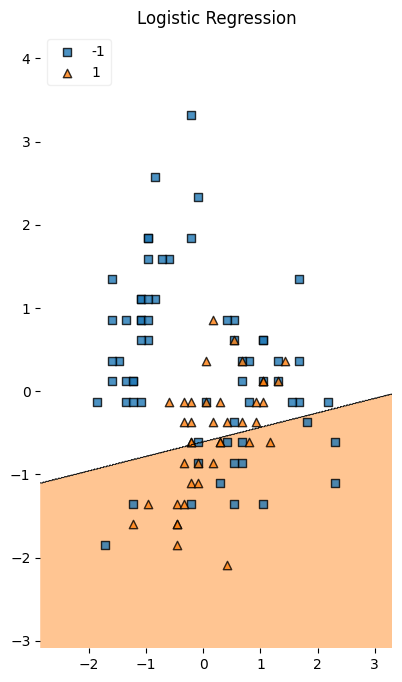

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression']
for clf, lab, grd in zip([lr],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

Теперь изучим свойства логистической регрессии.

**Задание 3.** Обучите три различные логистические регрессии с разным параметром регуляризации $\alpha$ (обратите внимание, что в реализации `sklearn` $C = 1/\alpha$). Как изменяется разделяющая поверхность в зависимости от $\alpha$?

In [16]:
C = [0.01, 0.05, 10]
# ConvergenceWarning
lr1 = LogisticRegression(C = C[0])
lr2 = LogisticRegression(C = C[1])
lr3 = LogisticRegression(C = C[2])

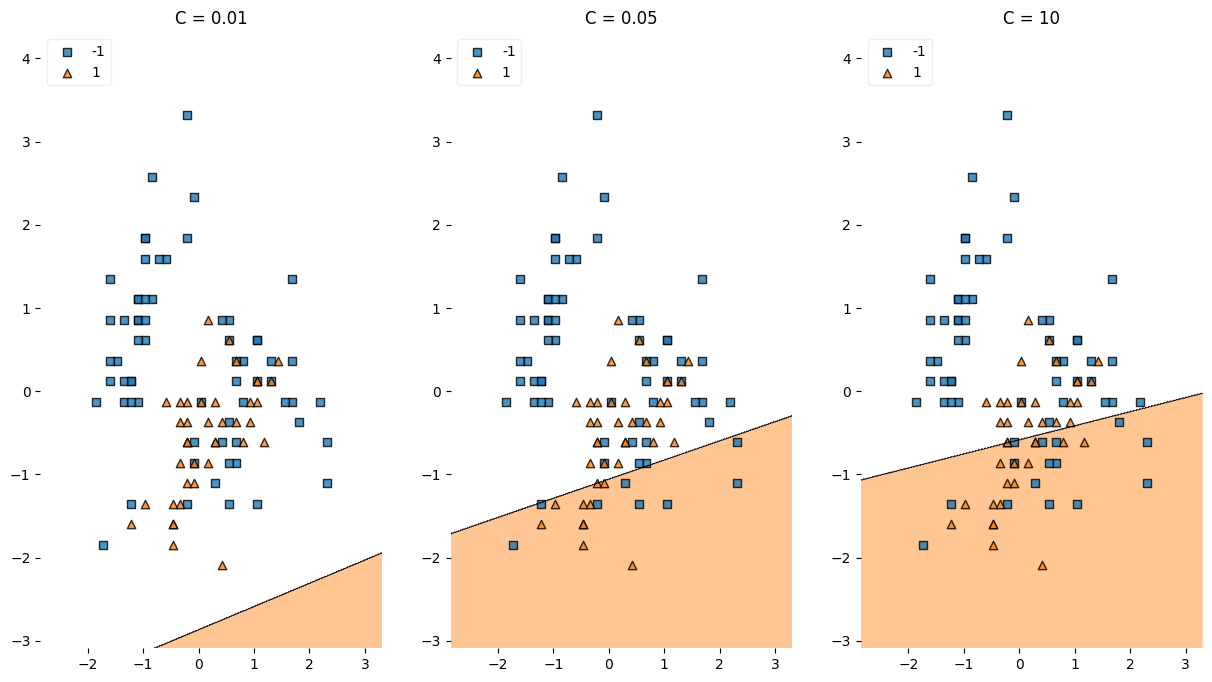

In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(15,8))

labels = ['C = 0.01', 'C = 0.05', 'C = 10']
for clf, lab, grd in zip([lr1, lr2, lr3],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train, y = np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задание 4.** Теперь попробуем понять, что происходит при решении задачи мягкой классификации. Выведите долю положительных наблюдений целевой переменной тренировочной выборки. Используя метод `predict_proba()`, сделайте предсказание по всей тренировочной выборке и найдите среднюю оценку вероятности принадлежности к положительному классу. Сравните полученную долю и среднюю предсказанную вероятность положительного класса. Как это можно объяснить? (подробный ответ в бонусной части в конце семинара).

In [18]:
(y_train == 1).sum() / len(y_train)

np.float64(0.38095238095238093)

In [19]:
lr.predict_proba(X_train)[:, 1].mean()

np.float64(0.38095338410965357)

### Логистическая регрессия на менее приятных данных

Мы будем работать с [набором данных](https://www.kaggle.com/piyushgoyal443/red-wine-dataset?select=wineQualityReds.csv), содержащим информацию о характеристиках вина. Каждое наблюдение принадлежит к одному из 10 категорий качества вина, и наша задача заключается в том, что предсказать эту категорию.

In [20]:
data = pd.read_csv('./wineQualityReds.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как указано в описании набора, в нём нет пропущенных значений, и все переменные являются непрерывными. Целевая переменная – `quality`.

**Задание 1.** Перейдём к задаче бинарной классификации и будем предсказывать только наиболее популярную категорию качества. Закодируйте столбец `quality` так, чтобы наиболее частая категория (это категория 5) получила метку 1, а все прочие категории – метку -1.

In [21]:
qual = data['quality'].copy()
qual[qual != 5] = -1
qual[qual == 5] = 1

In [22]:
qual.value_counts()

quality
-1    918
 1    681
Name: count, dtype: int64

In [23]:
681/len(qual)

0.425891181988743

**Задание 2.** Разделите признаки и целевую переменную. Разделите выборку на тренировочную и тестовую, долю тестовой выборки укажите равной 0.3. При помощи `StandardScaler` отмасштабируйте тренировочную и тестовую выборки.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis = 1), qual, test_size = 0.3)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Задание 3.** При помощи кросс-валидации (параметры выберите сами) подберите оптимальные значения коэффициентов регуляризации для логистической регрессии. Обучите модель с этими параметрами. Убедитесь, что доля правильных ответов – не лучший вариант для нашей задачи и рассчитайте F-меру на тестовой выборке.

In [25]:
from sklearn.model_selection import cross_validate

scores_lr = []

for c in np.arange(0.1, 10, 1):
    lr = LogisticRegression(C = c)

    cv_lr = cross_validate(lr, X_train, y_train, cv = 5, scoring = 'f1')['test_score']

    scores_lr.append(cv_lr.mean())

In [26]:
scores_lr

[np.float64(0.6813792197271316),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385),
 np.float64(0.6755367116051385)]

In [27]:
max(scores_lr)

np.float64(0.6813792197271316)

In [28]:
np.argmax(scores_lr) #argmin

np.int64(0)

In [29]:
np.arange(0.1, 10, 1)[np.argmax(scores_lr)]

np.float64(0.1)

In [30]:
lr = LogisticRegression(C = 0.1)

lr.fit(X_train, y_train)

print(f1_score(y_test, lr.predict(X_test)))

0.649746192893401


### ROC-кривая

Ранее мы узнали, что помимо accuracy в задачах классификации так же используются precision, recall и f-мера. Теперь пришло время познакомиться с ещё одной метрикой – ROC AUC.

Для начала вспомним, что мы работаем с матрицей ошибок:

|       | alg = 1          | alg = -1    |
|-------| -----------------|-------------|
|y = 1  |TP                |FN           |
|y = -1 |FP                | TN          |

Определим следующие величины:

$$
TPR \text{ (true positive rate, recall, sensitivity)} = \dfrac{TP}{TP + FN} –
$$
доля правильно предсказанных объектов положительного класса.

$$
FPR \text{ (false positive rate, 1 - specificity)} = \dfrac{FP}{FP + TN} –
$$
доля неправильно предсказанных объектов отрицательного класса.

Рассмотрим задачу мягкой классификации: мы предказываем вероятности принадлежности наблюдения к положительному и отрицательному классам. Тогда TPR и FPR будут зависеть от порога для вероятности, выше которого наблюдение будет отнесено к положительному классу. ROC-кривая строится в координатах $(FPR, TPR)$ и показывает комбинации TPR и FPR при всевозможных значениях порога.

Для хорошего классификатора эта кривая является вогнутой, а для идеального классификатора она будет проходить через точку $(0, 1)$ (почему?).

[<img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Roccurves.png" alt="drawing" width="350"/>](https://ru.wikipedia.org/wiki/ROC-кривая)



**Задание 1.** Постройте ROC-кривую для следующей выборки.

In [31]:
# True labels
y = [-1, 1, 1, -1, 1, 1]
# Predicted labels
p = [0.5, 0.1, 0.2, 0.9, 0.7, 0.1]

**Решение:**
1. Упорядочим наблюдения по убыванию ответов алгоритма.

In [32]:
y = [-1, 1, -1, 1, 1, 1]
p = [0.9, 0.7, 0.5, 0.2, 0.1, 0.1]

2. Разобьём единичный квадрат на $(m, n)$ частей, где $m$ – число 1 в $y$, $n$ – число нулей. Стартуем из точки $(0, 0)$. Если значение $y$ равно 1, делаем шаг вверх, а если -1 – вправо. Понятно, что конечная точка нашего маршрута – точка $(1, 1)$.

**(Попросите семинариста нарисовать это)**.

**Важный момент:** если у нескольких объектов значения предсказаний равны, а $y$ – различны, то мы должны сделать ход "по диагонали".

**(Попросите семинариста нарисовать это)**.

3. Полученная кривая и является ROC-кривой.

**(Почему этот алгоритм имеет смысл?)**

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y, p)

In [34]:
fpr

array([0. , 0.5, 0.5, 1. , 1. , 1. ])

In [35]:
tpr

array([0.  , 0.  , 0.25, 0.25, 0.5 , 1.  ])

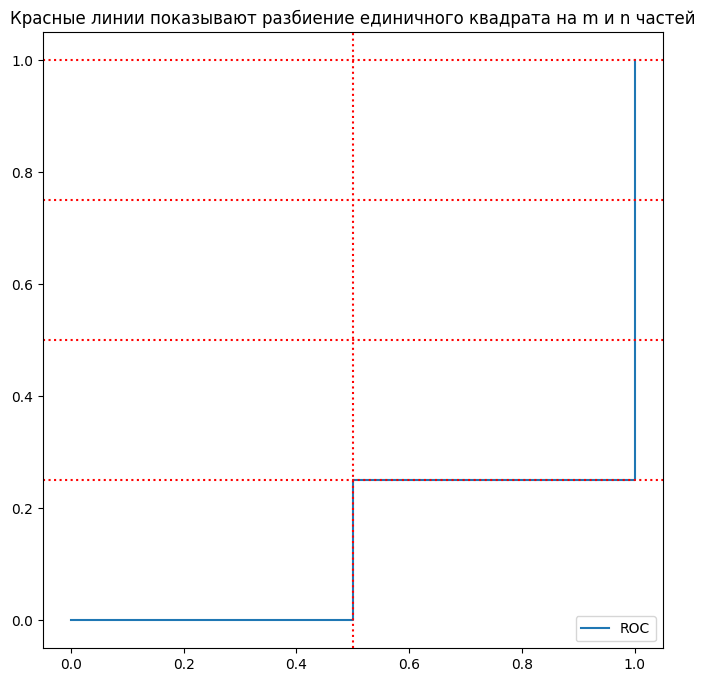

In [36]:
plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label = 'ROC')
plt.axvline(0.5, linestyle = 'dotted', c = 'red')
plt.axhline(0.25, linestyle = 'dotted', c = 'red')
plt.axhline(0.5, linestyle = 'dotted', c = 'red')
plt.axhline(0.75, linestyle = 'dotted', c = 'red')
plt.axhline(1.0, linestyle = 'dotted', c = 'red')
plt.title('Красные линии показывают разбиение единичного квадрата на m и n частей')
plt.legend()

**Пример 2. [(Источник мудрости)](https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/)**

In [37]:
p = [0.5, 0.1, 0.2, 0.6, 0.2, 0.3, 0.0]
y = [-1,  -1,   -1, 1,    1,   1,   -1]

In [38]:
fpr, tpr, _ = roc_curve(y, p)

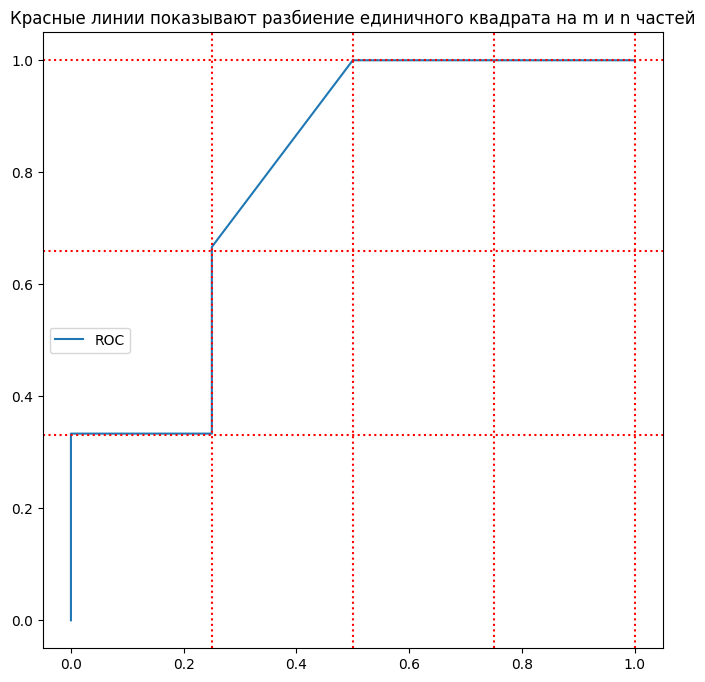

In [39]:
plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label = 'ROC')
plt.axvline(0.25, linestyle = 'dotted', c = 'red')
plt.axvline(0.5, linestyle = 'dotted', c = 'red')
plt.axvline(0.75, linestyle = 'dotted', c = 'red')
plt.axvline(1.0, linestyle = 'dotted', c = 'red')
plt.axhline(0.33, linestyle = 'dotted', c = 'red')
plt.axhline(0.66, linestyle = 'dotted', c = 'red')
plt.axhline(1.0, linestyle = 'dotted', c = 'red')
plt.title('Красные линии показывают разбиение единичного квадрата на m и n частей')
plt.legend()

In [40]:
# Упорядоченные:
p = [0.6, 0.5, 0.3, 0.2, 0.2, 0.1, 0.0]
y = [1, -1, 1, -1, 1, -1, -1]

**Задание 2.** ROC AUC – площадь под ROC-кривой – равна доле пар наблюдений $(y = 1, y = -1)$, которые алгоритм верно упорядочил. Таким образом, чем больше ROC AUC, тем качественнее отработал классификатор. Вычислите ROC AUC для построенной ROC-кривой.

Для примера 1: $0.25 \times 0.5$.

Для примера 2: вычислите площадь фигуры.

**Задание 3.** Как выглядит ROC-кривая для случайного классификатора?

Диагональ квадрата.

**Задание 4.** Как по ROC-кривой выбрать порог для бинаризации?

Выберите точку, которая соответствует вашим предпочтениям о соотношении TPR и FPR.

В `sklearn` реализовано вычисление значений ROC-кривой и площади под ней.

In [41]:
from sklearn.metrics import roc_curve, auc

**Задание 5.** Постройте ROC-кривую и рассчитайте площадь под ней для логистической регрессии. О чём говорит такая форма кривой? Чтобы показать это, постройте pairplot данных.

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])

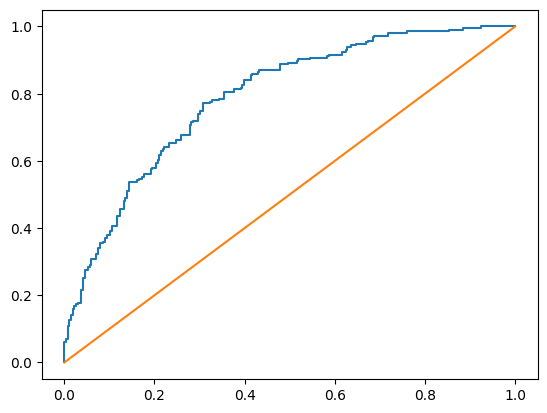

In [44]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr);

In [45]:
auc(fpr, tpr)

np.float64(0.7891399058393648)